## 포스트 코로나 데이터 시각화

- 가설1:  배달 시장의 수요가 증가로 인해 배달비가 인상될 것이다.
- 가설2: 유동인구 수가 감소하는 시기에는 뷰티소품의 구매율이 감소할 것이다.

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series, DataFrame

import datetime

import warnings
warnings.filterwarnings('ignore')


os.name == 'nt'
plt.rc('font', family='Malgun Gothic')

## 가설1. 배달 시장의 수요가 증가로 인해 배달비가 인상될 것이다.

In [ ]:
#배달 주문량이 증가함을 시각화 &  배달 업체 수수료 증가 시각화 &  배달팁이 증가함을 보여야 함
dlvr = pd.read_csv("C:/Users/user/Desktop/포스트코로나데이터/delivery.csv")
dlvr.head(10)

In [6]:
# 배달 주문량의 증가를 시각화하기 위해서 시간에 따른 음식 배달 건수를 count 한 결과 보여주기
# index: 배달 접수 시간(dlvr_rcept_time) , col: 배달 상점 업종 이름(dlvr_store_induty_nm), 
# data: count(serial_number)

pd.crosstab(index =dlvr.DLVR_RCEPT_TIME , columns = dlvr.DLVR_STORE_INDUTY_NM, values = dlvr.SERIAL_NUMBER, aggfunc = "sum")

DLVR_STORE_INDUTY_NM,도시락,돈까스/일식,배달전문업체,분식,심부름,아시안/양식,야식,족발/보쌈,중식,찜탕,치킨,카페/디저트,패스트푸드,피자,한식,회
DLVR_RCEPT_TIME,,,,,,,,,,,,,,,,
2020-01-01 00:00:02,NaN,NaN,NaN,4579306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4578871.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9157762.0,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:00:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4579387.0,4578977.0,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:00:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4578856.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-21 23:59:28,NaN,NaN,NaN,NaN,NaN,NaN,10672339.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-21 23:59:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10672161.0,NaN,NaN,NaN,NaN,NaN
2020-06-21 23:59:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10672331.0,NaN,NaN,NaN,NaN,NaN


In [7]:
#월 단위로 변화를 보기 위해 month 컬럼 만들어줌

dlvr['month'] = pd.to_datetime(dlvr['PROCESS_DT']).dt.month
dlvr.head(10)

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,month
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN,1
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN,1
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN,1
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN,1
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN,1
5,4577993,2020-01-01,C000238,1,C000238,S0001485,족발/보쌈,4119010800,경기도,부천시,...,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,NaN,1
6,4577994,2020-01-01,C000049,1,C000049,S0022461,분식,1153010800,서울특별시,구로구,...,3800,300,28000,2,NaN,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,NaN,1
7,4577995,2020-01-01,C000238,1,C000238,S0001037,야식,4119010200,경기도,부천시,...,3500,200,28500,2,NaN,2020-01-01 00:09:40,2020-01-01 00:17:31,2020-01-01 00:32:24,NaN,1
8,4577996,2020-01-01,C000104,1,C000101,S0021988,치킨,1156013300,서울특별시,영등포구,...,4800,200,17000,1,승인:KB국민카드,2020-01-01 00:51:49,2020-01-01 00:52:12,2020-01-01 01:23:41,NaN,1
9,4577997,2020-01-01,C000031,1,C000043,S0028777,야식,4115010600,경기도,의정부시,...,3500,300,22000,1,승인:신한카드,2020-01-01 00:10:34,2020-01-01 00:11:10,2020-01-01 00:26:04,NaN,1


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

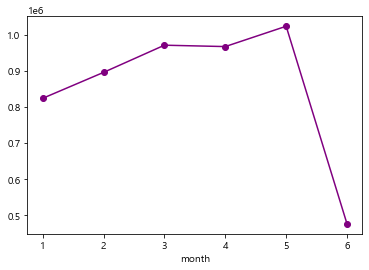

In [9]:
dg = dlvr.groupby('month')
dg['SERIAL_NUMBER'].count().plot( c='purple',marker = 'o')
week_mean = pd.DataFrame(dg.month.resample('W').mean())

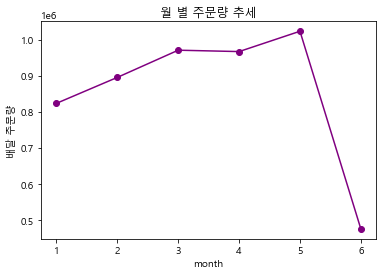

In [9]:
dg = dlvr.groupby('month')
dg['SERIAL_NUMBER'].count().plot( c='purple',marker = 'o')
plt.ylabel('배달 주문량')
plt.title('월 별 주문량 추세')
plt.show()

In [ ]:
week_mean = pd.DataFrame(dg.SERIAL_NUMBER.resample('W').mean())

- 수수료 & 배달비 증가 시각화

In [10]:
#수수료 & 배달비 
dlvr[["DLVR_AMOUNT","CALL_RLAY_FEE_AMOUNT"]].head(10)

,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT
0,4290,300
1,4800,200
2,3300,300
3,4500,300
4,6500,300
5,3500,200
6,3800,300
7,3500,200
8,4800,200
9,3500,300


In [ ]:
# 시간에 따른 수수료 & 배달비 변화 시각화

fig = plt.figure()
fig.set_size_inches(10,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].bar(dlvr['month'], dlvr["DLVR_AMOUNT"],color="r", linestyle="dotted", label='배달비')
ax[1].bar(dlvr['month'], dlvr["CALL_RLAY_FEE_AMOUNT"], color="b", linestyle="-", label='수수료')

plt.legend(shadow=True, fancybox=True)
plt.title("배달비 & 수수료 변화 추세")
plt.show()

## 가설2: 유동 인구 수가 감소하는 시기에는 뷰티용품 구매율이 감소할 것이다.

- 데이터 불러오기 (유동인구)

In [2]:
fpopl = pd.read_csv("C:/Users/user/Desktop/포스트코로나데이터/fpopl.csv")

#month 컬럼 만들어서 월 별 비교하기
fpopl['month'] = pd.to_datetime(fpopl['base_ymd']).dt.month

In [4]:
fpopl.head(10)

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,month
0,20200101,0,M,age_00,11650560,15,1
1,20200101,0,M,age_00,11590620,6,1
2,20200101,0,M,age_00,11560710,4,1
3,20200101,0,M,age_00,11470680,12,1
4,20200101,0,M,age_00,11350665,6,1
5,20200101,0,M,age_00,11305575,10,1
6,20200101,0,M,age_00,11290725,12,1
7,20200101,0,F,age_00,11740540,12,1
8,20200101,0,F,age_00,11680600,16,1
9,20200101,0,F,age_00,11620525,9,1


In [ ]:
#월 별로 유동인구 수 비교

#sns.set(style="darkgrid")
sns.barplot(x="month", y="popltn_cascnt", data=fpopl)

- 시간에 따른 뷰티소품 구매율 변화 시각화

In [5]:
#데이터 불러오기 (구매 물품)
buy = pd.read_csv("C:/Users/user/Desktop/포스트코로나데이터/index.csv")

#period 컬럼에서 데이터 출력 방식 정하기
buy['period'] = buy['period'].astype(str)
buy['period'] = buy['period'].apply(lambda x : x[:4] + '-' + x[-2:])
buy['period'] = pd.to_datetime(buy['period'])
buy['month'] = pd.to_datetime(buy['period']).dt.month
buy['year'] = pd.to_datetime(buy['period']).dt.year

buy

,period,catl,catm,age,gender,sido,sigungu,cgi,month,year
0,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,1,2019
1,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,1,2019
2,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,1,2019
3,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,1,2019
4,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,1,2019
...,...,...,...,...,...,...,...,...,...,...
127520,2020-05-01,화장품,화장품,all,all,서울,강서구,51.365660,5,2020
127521,2020-05-01,화장품,화장품,all,all,서울,관악구,61.997865,5,2020
127522,2020-05-01,화장품,화장품,all,all,서울,금천구,82.198402,5,2020
127523,2020-05-01,화장품,화장품,all,all,서울,도봉구,35.875600,5,2020


In [6]:
grouped = buy.groupby("catm")
df = grouped.get_group("뷰티소품")

df.groupby(['year','month']).count()
#sns.lineplot(x="period", y=[buy['catl'] == '뷰티용품'],data=buy, color="r")


period  catl  catm  age  gender  sido  sigungu  cgi
year month                                                     
2019 1         445   445   445  445     445   445      445  445
     2         451   451   451  451     451   451      451  451
     3         461   461   461  461     461   461      461  461
     4         463   463   463  463     463   463      463  463
     5         458   458   458  458     458   458      458  458
     6         454   454   454  454     454   454      454  454
     7         458   458   458  458     458   458      458  458
     8         464   464   464  464     464   464      464  464
     9         461   461   461  461     461   461      461  461
     10        460   460   460  460     460   460      460  460
     11        460   460   460  460     460   460      460  460
     12        463   463   463  463     463   463      463  463
2020 1         458   458   458  458     458   458      458  458
     2         461   461   461  461     461   461      461  461
     3         460   460   460  460     460   460      460  460
     4         461   461   461  461     461   461      461  461
     5         450   450   450  450     450   450      450  450

In [7]:
#df[df['year']=='2020'].groupby('month').count()

,period,catl,catm,age,gender,sido,sigungu,cgi,year
month,,,,,,,,,


In [10]:
# 뷰티소품 소비지수 변화 시각화

bt = sns.countplot(x="year_2020", hue='month', data=df)
bt.set_ylabel('뷰피소품 소비지수')
bt.set_title('뷰티소품 소비지수의 변화')

KeyError: '2020'

#### 가설 2의 결론: 유동인구가 3월에 가장 적어 